In [70]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_db = pd.read_csv(mouse_drug_data_to_load)
clinic_db = pd.read_csv(clinical_trial_data_to_load)
mouse_db.head()
# Combine the data into a single dataset
mc_db = pd.merge(clinic_db, mouse_db, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mc_db.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [71]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mca_db = mc_db.copy()
mca_db = mca_db.groupby(['Drug','Timepoint'])
gd = mca_db.mean()
gd.head(20)
# Convert to DataFrame

# Preview DataFrame


Tumor Volume (mm3)  Metastatic Sites
Drug      Timepoint                                      
Capomulin 0                   45.000000          0.000000
          5                   44.266086          0.160000
          10                  43.084291          0.320000
          15                  42.064317          0.375000
          20                  40.716325          0.652174
          25                  39.939528          0.818182
          30                  38.769339          1.090909
          35                  37.816839          1.181818
          40                  36.958001          1.380952
          45                  36.236114          1.476190
Ceftamin  0                   45.000000          0.000000
          5                   46.503051          0.380952
          10                  48.285125          0.600000
          15                  50.094055          0.789474
          20                  52.157049          1.111111
          25                  54.287674          1.500000
          30                  56.769517          1.937500
          35                  58.827548          2.071429
          40                  61.467895          2.357143
          45                  64.132421          2.692308

In [72]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Convert to DataFrame
mcs_db = mc_db.copy()
mcs_db = mcs_db.groupby(['Drug','Timepoint'])
ss = mcs_db.sem()
del ss['Metastatic Sites']
del ss['Mouse ID']

# Preview DataFrame
ss.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [109]:
# Minor Data Munging to Re-Format the Data Frames
drugs = gd.index.levels[0]
timepoints = gd.index.levels[1]
data = list(gd['Tumor Volume (mm3)'])

import array as arr
numbers_array = arr.array('f', data)
numbers_array[0:len(timepoints)]

df = pd.DataFrame()
indx = 0
endx = len(timepoints)
for drug in drugs:
    df[drug] = numbers_array[indx:endx].tolist()
    indx += len(timepoints)
    endx += len(timepoints)

df["Timepoint"] = timepoints
df.set_index("Timepoint",inplace = True)
# Preview that Reformatting worked   
df.head()

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266087,46.503052,47.062000,47.389175,46.796097,47.125587,47.248966,43.944859,47.527451,46.851818
10,43.084290,48.285126,49.403908,49.582268,48.694210,49.423328,49.101540,42.531956,49.463844,48.689880
15,42.064316,50.094055,51.296398,52.399975,50.933018,51.359741,51.067318,41.495060,51.529408,50.779060
20,40.716324,52.157047,53.197689,54.920937,53.644089,54.364418,53.346737,40.238323,54.067394,53.170334


Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril'], dtype='object')
Int64Index([0, 5, 10, 15, 20, 25, 30, 35, 40, 45], dtype='int64', name='Timepoint')


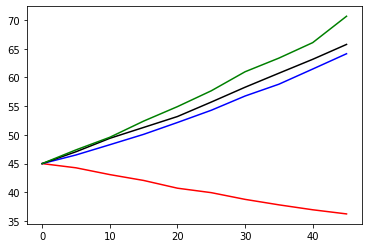

In [115]:
# Generate the Plot (with Error Bars)

# Save the Figure
years = df.keys()
print(years[0:4])
print(df.index)

# Save the Figure
colors = ['red','blue','black','green']

for i in range(4):
    plt.plot(df.index, df[years[i]], color=colors[i], label=years[i] )

# Show the chart
plt.show()


## Metastatic Response to Treatment

In [77]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [78]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [79]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [80]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


## Survival Rates

In [81]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


In [82]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [83]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

## Summary Bar Graph

In [84]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [85]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

NameError: name 'fig' is not defined